# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [271]:
import pandas as pd

# Importe as bibliotecas

In [272]:
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')

# leia os conjuntos de dados em DataFrames

In [273]:
products = pd.read_csv('/datasets/products.csv',sep=';')

# imprima as informações sobre o DataFrame

In [274]:
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')

# imprima as informações sobre o DataFrame

In [275]:
departments = pd.read_csv('/datasets/departments.csv',sep=';')

# imprima as informações sobre o DataFrame

In [306]:
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

# imprima as informações sobre o DataFrame

In [277]:
print(orders, products, aisles, departments, order_products)

# imprima as informações sobre o DataFrame

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

## Conclusões

Ao analisar o número de identificação de cada pedido (order_id) verificamos que há um total de 478967, 
porém há dados ausentes na coluna que indica a os dias que se passaram desde a última compra (days_since_prior_order), 
sendo um total de 450148. Nas colunas temos dados float e inteiros. Também há 15 itens duplicados.
Para produtos há um total de 49694 registros, sendo do tipo float e object. Não há dados ausentes ou duplicados.
Há um total de 5 corredores (aisles) e as colunas são do tipo float e object. Não há dados ausentes ou duplicados.
Há um total de 5 departamentos (deparments) e as colunas são do tipo int e object. Não há dados ausentes ou duplicados.
No arquivo de itens do pedido (order_products) há 5 registros do tipo float e int. Não há dados ausentes ou duplicados.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Com base na análise acima, será necessidade trabalhar os dados da coluna order_id, retirando os dados ausentes e duplicados.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [278]:
orders.duplicated().sum()

# Verificar se há pedidos duplicados

15

Há 15 linhas duplicadas. 

In [279]:
orders[orders.duplicated()]

# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


É possível confirmar que os duplicados se concentram em compras feitas 
às quartas-feiras (order_dow) e às 2 da manhã (order_hour_of_day).

In [280]:
orders.drop_duplicates(inplace=True)

# Remova pedidos duplicados

In [281]:
orders.duplicated().sum()

# Verifique as linhas duplicadas mais uma vez

0

In [282]:
duplicated_order_ids = products[products.duplicated('product_id')].sum()

duplicated_order_ids

# Verifique novamente apenas os IDs de pedidos duplicados

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

As 15 linhas duplicadas foram removidas pela função drop() e confirmadas ao rodar novamente apenas os IDs duplicados.

#Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `products`

In [283]:
products.duplicated().sum()

# Verifique se há linhas completamente duplicadas

0

In [284]:
duplicated_products_ids = products[products.duplicated('product_id')].sum()

duplicated_products_ids

# Verifique apenas IDs dos produtos duplicados

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [285]:
products.drop_duplicates(inplace=True)
products.duplicated().sum()

products_name_lower = products['product_name'].str.lower()
products_name_lower

# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

In [286]:
products.drop_duplicates(inplace=False)
products.duplicated().sum()

# Verifique os nomes de produtos duplicados que não estão faltando

0

Não há valores duplicados em 'products', porém o nome dos produtos estavam em maísculas. Os nomes foram convertidos para minúsculos para facilitar as comparações.

#Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `departments`

In [287]:
departments.duplicated().sum()

# Verifique se há linhas completamente duplicadas

0

In [288]:
departments_duplicated_count = departments.duplicated(subset=['department_id']).sum()
departments_duplicated_count


# Verifique apenas se há IDs dos produtos duplicados

0

Não encontramos registros duplicados em departamentos.

### DataFrame `aisles`

In [289]:
aisles.duplicated().sum()

# Verifique se há linhas completamente duplicadas

0

In [290]:
aisles_duplicated_count = aisles.duplicated(subset=['aisle_id']).sum()
print(aisles_duplicated_count)

# Verifique apenas se há IDs dos produtos duplicados

0


Não encontramos registros duplicados em corredores.

### DataFrame `order_products`

In [291]:
order_products.duplicated().sum()

# Verifique se há linhas completamente duplicadas

0

In [292]:
order_products_duplicated_count = order_products.duplicated(subset=['order_id','product_id','add_to_cart_order','reordered']).sum()
print(order_products_duplicated_count)

# Verifique mais uma vez se há outros casos complicados de duplicados

0


Não encontramos registros duplicados nos itens dos pedidos comprados.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [293]:
products['product_name'].isna().sum()

# Encontre valores ausentes na coluna 'product_name'

1258

In [294]:
products['product_name'].isna().sum()

1258

Há 1258 valores ausentes no arquivo 'products', na coluna que possui o nome dos produtos. Descreva brevemente suas conclusões.

In [295]:
products[products['aisle_id'] == 100]

# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Do total de 1258 valores ausentes no arquivo 'products', podemos identificar que a totalidade está concentrada no corredor 100.

In [296]:
products[products['department_id'] == 21]

# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Do total de 1258 valores ausentes no arquivo 'products', podemos identificar que a totalidade está concentrada no deparamento 21.

In [297]:
products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]

# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Os valores ausentes no arquivo 'products' no total de 1258, estão concentrados no corredor 100 e departamento 21. 

In [298]:
products['product_name'].fillna('Unknown', inplace=True)
products.isna().sum()

# Preencha nomes de produtos ausentes com 'Unknown'

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

A função fillna() foi aplicada para substituir os nomes ausentes pela palavra 'Unknown'. 

### DataFrame `orders`

In [299]:
orders.isna().sum()

# Encontre os valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [300]:
orders[orders['days_since_prior_order'].isna()]['order_number'].value_counts()


# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

1    28817
Name: order_number, dtype: int64

Há 28817 registros ausentes na coluna 'days_since_prior_order' referentes à valores ausentes para clientes que não estão fazendo o primeiro pedido.

### DataFrame `order_products`

In [301]:
order_products.isna().sum()

# Encontre os valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [302]:
order_products= [
    (order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max())
]
order_products

# Quais são os valores mínimo e máximo dessa coluna?

[(1.0, 64.0)]

O valor mínimo adicionado ao carrinho foi de 1.0, enquanto que o máximo foi de 64.0.

In [371]:
at_least_one_missing_value = order_products[order_products['add_to_cart_order'].isna()]['order_id']
at_least_one_missing_value.head()

# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64

In [ ]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

order_products[order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count().min()
  

Todos os pedidos com valores ausentes possuem mais que 64 produtos.

In [ ]:
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products.isna().sum()
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info()

# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [372]:
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


In [373]:
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Simm, as horas estão dentro do limite aceitável dentro das 24 horas. 

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<AxesSubplot:xlabel='order_hour_of_day'>

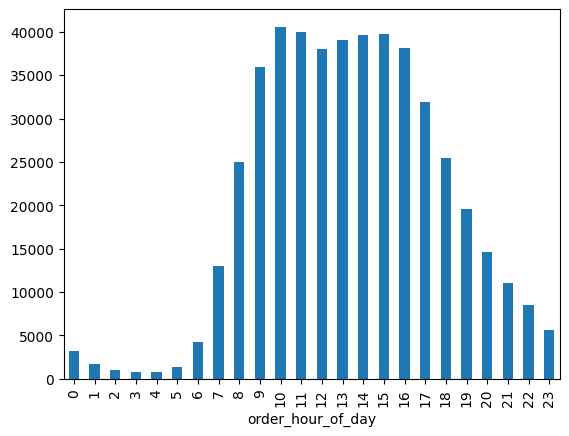

In [378]:
orders.groupby('order_hour_of_day')['user_id'].count().plot(kind='bar')

Podemos perceber pela distribuição dos horários que a maior parte das pessoas realizam suas compras entre o período de 9 às 17 horas. 

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

<AxesSubplot:xlabel='order_dow'>

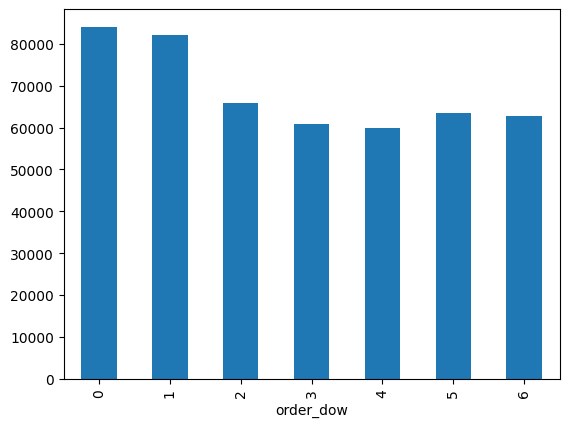

In [377]:
orders.groupby('order_dow')['order_id'].count().plot(kind='bar')

O dia que as pessoas mais compram é aos domingos, seguido de perto pela segunda-feira. 

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

A média de tempo é de 11 dias.

<AxesSubplot:ylabel='Frequency'>

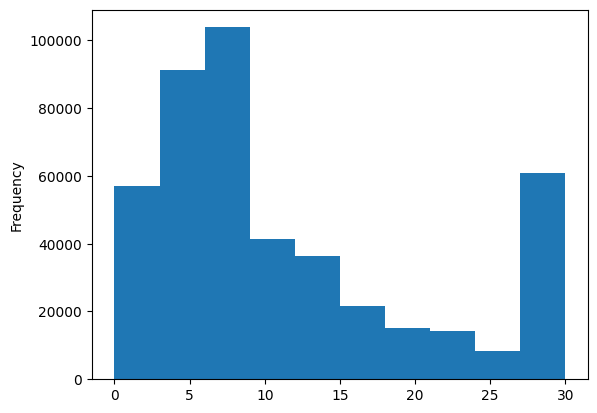

In [376]:
orders['days_since_prior_order'].plot(kind='hist')

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

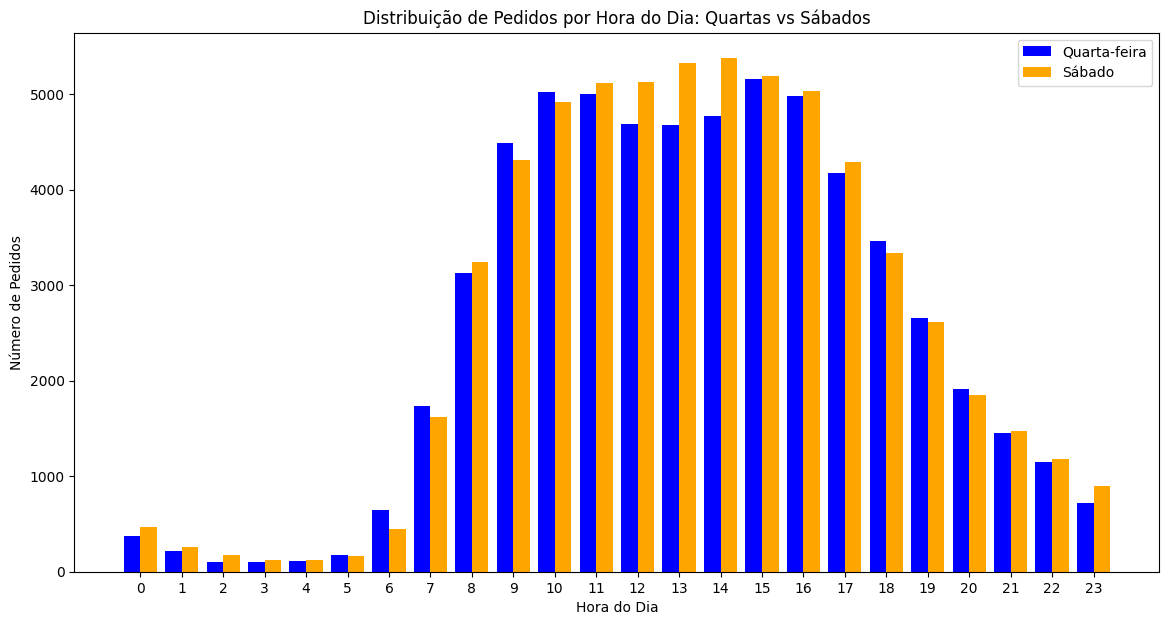

In [375]:
import pandas as pd
import matplotlib.pyplot as plt

orders_wednesday = orders[orders['order_dow'] == 3]
orders_saturday = orders[orders['order_dow'] == 6]

hourly_distribution_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_distribution_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.bar(hourly_distribution_wednesday.index - 0.2, hourly_distribution_wednesday.values, width=0.4, label='Quarta-feira', color='blue', align='center')
plt.bar(hourly_distribution_saturday.index + 0.2, hourly_distribution_saturday.values, width=0.4, label='Sábado', color='orange', align='center')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia: Quartas vs Sábados')
plt.xticks(range(24))
plt.legend()
plt.show()
# Mostrar todas as horas do dia no eixo x

Em geral, as compras de sábado são maiores em todos os horários, exceto entre 9 e 10 da manhã, com pequena diferença.

### [B2] Qual é a distribuição do número de pedidos por cliente?

<AxesSubplot:ylabel='Frequency'>

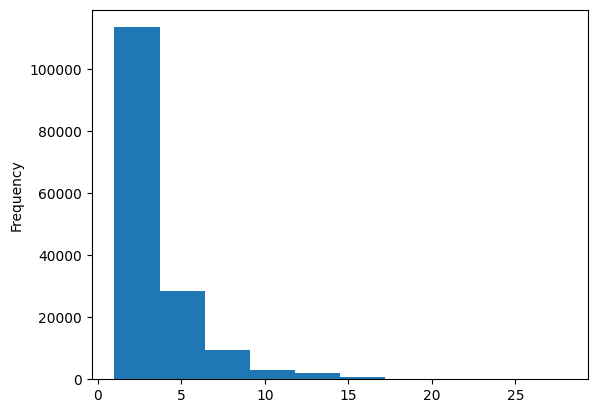

In [374]:
orders.groupby(['user_id'])['order_id'].count().plot(kind='hist')


A maioria dos clientes realizam entre 1 e 3 pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [308]:
df_most_populars = order_products.merge(products, on='product_id')
df_most_populars

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10.0,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2.0,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1.0,0,Total Mint Stripe Gel Toothpaste,20,11


In [327]:
df_most_populars.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)                                                                                                              

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

Para investigar os produtos mais populares, primeiramente foi necessário juntar duas tabelas com a chave de produtos. Posteriormente, os dados foram agrupados por nome e id do produto, trazendo os 20 mais populares em ordem alfabética, sendo Banana, código 24852 a mais popular.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

<Figure size 1300x900 with 0 Axes>

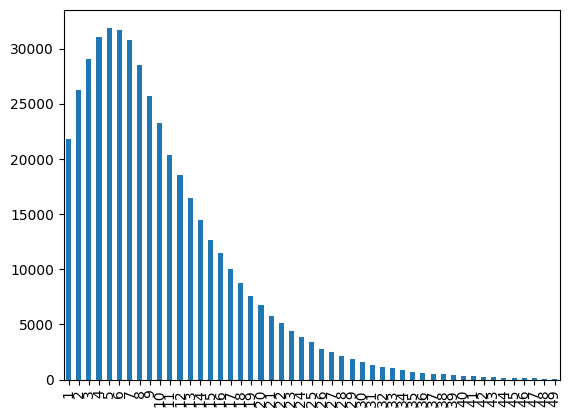

<Figure size 1300x900 with 0 Axes>

In [370]:
buy_per_order=order_products.groupby(['order_id'])['product_id'].count()
hist = buy_per_order.value_counts().sort_index()
hist[hist.index < 50].plot(kind='bar')
plt.figure(figsize=(13, 9))

A maioria das pessoas compram em média cinco produtos por pedido.

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [329]:
df_most_populars = order_products[order_products['reordered']==1].merge(products, on='product_id')
df_most_populars.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20).reset_index()

,product_id,product_name,order_id
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945
